In [1]:
print('26個英文字母，測試一下學習字母n個，預測下一個')
print('一對一')
str1 = 'abcdefghijklmnopqrstuvwxyz'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 編碼處理、字數控制
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical  # one hot 處理
import numpy as np
np.random.seed(9)

26個英文字母，測試一下學習字母n個，預測下一個
一對一


In [2]:
# 先介紹Tokenizer，26個字母沒有進行tokenizer的原因是有進行手動的word與index對應
from tensorflow.keras.preprocessing.text import Tokenizer
texts = ['I love Deep Learning', 'NLP is fun', 'I love RNN and CNN']
tokenizer = Tokenizer()
print('訓練後得到word與index')
tokenizer.fit_on_texts(texts)
print('顯示程式處理後的word與index')
print(tokenizer.word_index)
print('訓練後得到序列')
sequences = tokenizer.texts_to_sequences(texts)
print(sequences)
print('序列就標示了字的位置，所以可以反向轉回文字')
reverse = tokenizer.sequences_to_texts(sequences)
print(reverse)

訓練後得到word與index
顯示程式處理後的word與index
{'i': 1, 'love': 2, 'deep': 3, 'learning': 4, 'nlp': 5, 'is': 6, 'fun': 7, 'rnn': 8, 'and': 9, 'cnn': 10}
訓練後得到序列
[[1, 2, 3, 4], [5, 6, 7], [1, 2, 8, 9, 10]]
序列就標示了字的位置，所以可以反向轉回文字
['i love deep learning', 'nlp is fun', 'i love rnn and cnn']


In [3]:
print('帶入神經網路之前，將序列轉換為整齊的資料')
print('長度要一致，可是序列有長有短，該怎麼處理?')
print('可以選擇前面補齊或截斷，也可以選擇後面補齊或截斷')
print('可挑選一個或同時進行')

from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, maxlen = 4, padding='pre', truncating='pre')
print(data)
data1 = pad_sequences(sequences, maxlen = 4, truncating='pre')
print(data1)
data1 = pad_sequences(sequences, maxlen = 4)
print(data1)
data = pad_sequences(sequences, maxlen = 4, padding='post', truncating='post')
print(data)
data = pad_sequences(sequences, maxlen = 4, padding='post', truncating='post', value = 100)
print(data)

帶入神經網路之前，將序列轉換為整齊的資料
長度要一致，可是序列有長有短，該怎麼處理?
可以選擇前面補齊或截斷，也可以選擇後面補齊或截斷
可挑選一個或同時進行
[[ 1  2  3  4]
 [ 0  5  6  7]
 [ 2  8  9 10]]
[[ 1  2  3  4]
 [ 0  5  6  7]
 [ 2  8  9 10]]
[[ 1  2  3  4]
 [ 0  5  6  7]
 [ 2  8  9 10]]
[[1 2 3 4]
 [5 6 7 0]
 [1 2 8 9]]
[[  1   2   3   4]
 [  5   6   7 100]
 [  1   2   8   9]]


In [4]:
print('手動設定str1的word與index對應')
char_to_int = dict((c, i) for i, c in enumerate(str1))
print(char_to_int)
int_to_char = dict((i, c) for i, c in enumerate(str1))
print(int_to_char)
print('LSTM資料集準備')
seq_length = 1
print('題目要求，依照順序預測下一個字母')
dataX = []
dataY = []

for i in range(0, len(str1) - seq_length, 1):
    seq_in = str1[i:i + seq_length]
    seq_out = str1[i + seq_length]
    print(seq_in, seq_out)
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])

print(dataX)
print(dataY)

手動設定str1的word與index對應
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}
LSTM資料集準備
題目要求，依照順序預測下一個字母
a b
b c
c d
d e
e f
f g
g h
h i
i j
j k
k l
l m
m n
n o
o p
p q
q r
r s
s t
t u
u v
v w
w x
x y
y z
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24]]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [5]:
print('即將用LSTM進行訓練')
print('X資料正規化')
X = np.reshape(dataX, (len(dataX), seq_length, 1))
print(X.shape)
print(X)
X = X / float(len(str1))
print(X)
print('Y資料進行編碼')
y = to_categorical(dataY)
print(y)
print('建立模型')
model = Sequential()
model.add(LSTM(32, input_shape = (X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X, y, epochs = 300, batch_size = 1)

即將用LSTM進行訓練
X資料正規化
(25, 1, 1)
[[[ 0]]

 [[ 1]]

 [[ 2]]

 [[ 3]]

 [[ 4]]

 [[ 5]]

 [[ 6]]

 [[ 7]]

 [[ 8]]

 [[ 9]]

 [[10]]

 [[11]]

 [[12]]

 [[13]]

 [[14]]

 [[15]]

 [[16]]

 [[17]]

 [[18]]

 [[19]]

 [[20]]

 [[21]]

 [[22]]

 [[23]]

 [[24]]]
[[[0.        ]]

 [[0.03846154]]

 [[0.07692308]]

 [[0.11538462]]

 [[0.15384615]]

 [[0.19230769]]

 [[0.23076923]]

 [[0.26923077]]

 [[0.30769231]]

 [[0.34615385]]

 [[0.38461538]]

 [[0.42307692]]

 [[0.46153846]]

 [[0.5       ]]

 [[0.53846154]]

 [[0.57692308]]

 [[0.61538462]]

 [[0.65384615]]

 [[0.69230769]]

 [[0.73076923]]

 [[0.76923077]]

 [[0.80769231]]

 [[0.84615385]]

 [[0.88461538]]

 [[0.92307692]]]
Y資料進行編碼
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,210 (20.35 KB)

 Trainable params: 5,210 (20.35 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 3.2630
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1564 - loss: 3.2565
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0290 - loss: 3.2531
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0290 - loss: 3.2455
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0395 - loss: 3.2455
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0778 - loss: 3.2448     
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0322 - loss: 3.2458
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0099 - loss: 3.2380    
Epoch 9/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0232 - loss: 3.2390
Epoch 10/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0031 - loss: 3.2350
Epoch 11/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0486 - loss: 3.2289     
Epoch 12/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 

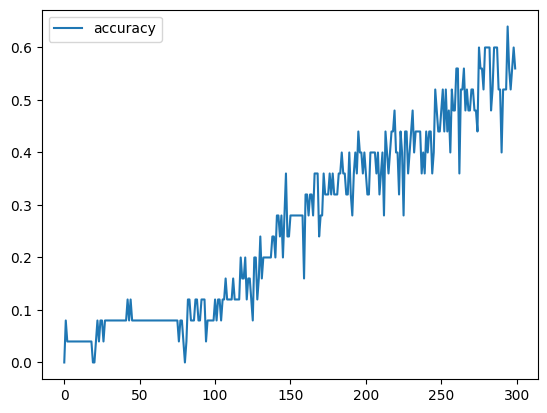

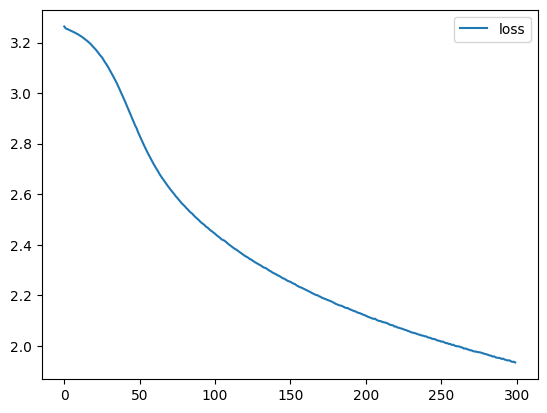

是否多跑一些就讓他loss下降更多?
Epoch 1/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6233 - loss: 1.9284
Epoch 2/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6088 - loss: 1.9039
Epoch 3/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5537 - loss: 1.9376
Epoch 4/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4651 - loss: 1.9610
Epoch 5/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 1.9834
Epoch 6/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 1.8973
Epoch 7/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 1.9068
Epoch 8/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6155 - loss: 1.9387
Epoch 9/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7726 - loss: 1.8683 
Epoch 10/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5472 - loss: 1.7938
Epoch 11/800
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3854 - loss: 1.9465     
Epoch 12/800
25/25 ━━━━━━━━━━━━━━━━━━━

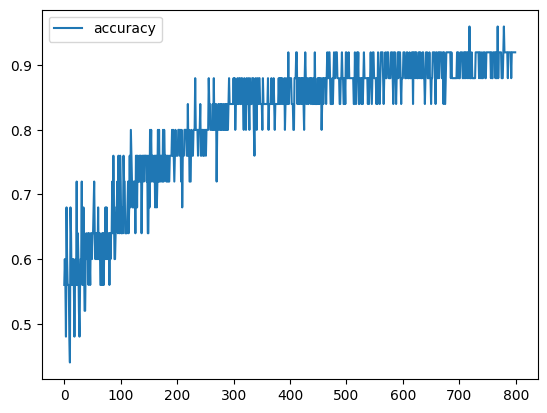

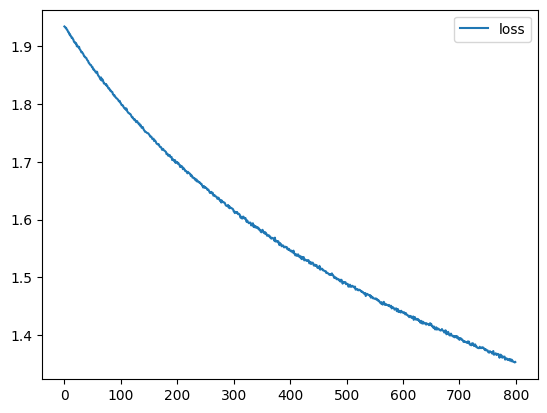

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()
print('是否多跑一些就讓他loss下降更多?')
history = model.fit(X, y, epochs = 800, batch_size = 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [7]:
print('進行預測')
for i in dataX:
  x = np.reshape(i, (1, len(i), 1))
  x = x / float(len(str1))
  predict1 = model.predict(x, verbose = 0)
  index = np.argmax(predict1)
  result = int_to_char[index]
  print(result)

進行預測
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
z
z
